7.6 Maximum likelihood estimation of an increasing nonnegative sigmal

In [13]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)
N = 100

# create an increasing input signal
xtrue = np.zeros(N)
xtrue[0:40] = 0.1
xtrue[49] = 2
xtrue[69:80] = 0.15
xtrue[79] = 1
xtrue = np.cumsum(xtrue)

# pass the increasing input through a moving-average filter 
# and add Gaussian noise
h = np.array([1, -0.85, 0.7, -0.3])
k = h.size
yhat = np.convolve(h,xtrue)
y = yhat[0:-3].reshape(N,1) + np.random.randn(N,1)

xtrue = np.asmatrix(xtrue.reshape(N,1))
y = np.asmatrix(y)

In [12]:
# MLE estimate
x = cp.Variable(N)
objective = cp.Minimize(cp.sum_squares(y - cp.conv(h, x)[:-3]))
constraints = [x >= 0, x[1:] - x[:-1] >= 0]
prob = cp.Problem(objective, constraints)
result = prob.solve()
# estimate x_{ml,free}
x_free = cp.Variable(N)
objective_free = cp.Minimize(cp.sum_squares(y - cp.conv(h, x_free)[:-3]))
prob_free = cp.Problem(objective_free)
result_free = prob_free.solve()

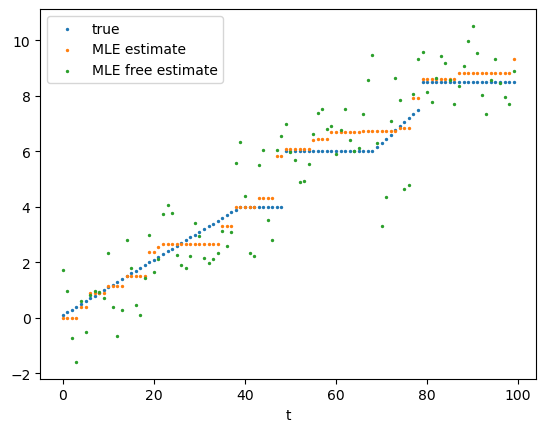

In [52]:
plt.scatter(np.arange(N), np.array(xtrue).flatten(), label='true', s=2)
plt.scatter(np.arange(N), x.value, label='MLE estimate', s=2)
plt.scatter(np.arange(N), x_free.value, label='MLE free estimate', s=2)
plt.xlabel('t')
plt.legend()
plt.show()